# Report 6: Random Numbers
Amara Khan <br>
Person#: 50035059

In this report, we look at different situations in which random numbers can be implemented. Some of these situations are probability, looking at distribution, stock prices, and so on.

In [231]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import rand
from math import *
import math as mth
from numpy.random import randn
from numpy.random import randint

## Exercise 1. Linear Congruential Generators

In [61]:
def rng(x, npts):
    a = 427419669081
    m = 999999999989
    u = np.empty(npts)
    u[0] = x/m
    for i in range(1, npts):
        x = (a*x) % m
        u[i] = x/m
    return u

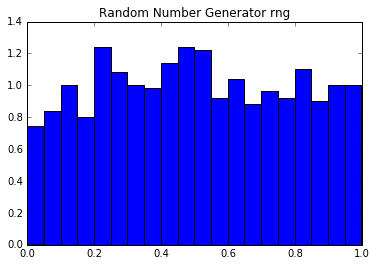

In [62]:
rng1 = rng(10, 1000)
plt.hist(rng1, bins=20, normed=True);
plt.title("Random Number Generator rng");

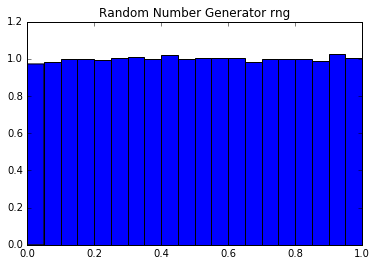

In [63]:
rng2 = rng(10, 100000)
plt.hist(rng2, bins=20, normed=True);
plt.title("Random Number Generator rng");

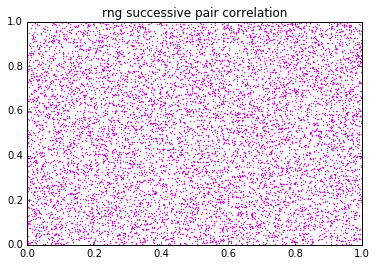

In [372]:
rng3 = rng(50,10000)
plt.plot(rng3[:-1], rng3[1:], 'm.', ms=2, alpha=.7)
plt.title('rng successive pair correlation');

In [65]:
def randu(x2, npts):
    a = 2**16 + 3
    m = 2**31
    u = np.empty(npts)
    u[0] = x2/m
    for i in range(1, npts):
        x2 = (a*x2) % m
        u[i] = x2/m
    return u

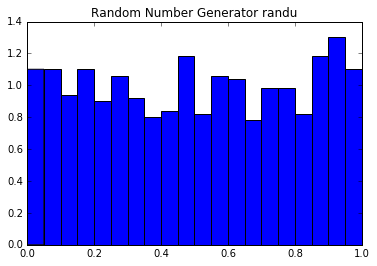

In [66]:
randu1 = randu(10,1000)
plt.hist(randu1, bins=20, normed=True);
plt.title("Random Number Generator randu");

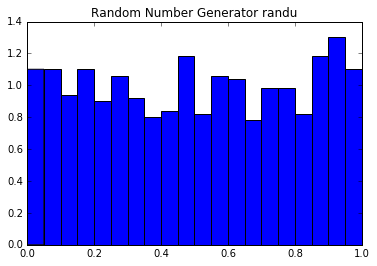

In [67]:
randu2 = randu(10,100000)
plt.hist(randu1, bins=20, normed=True);
plt.title("Random Number Generator randu");

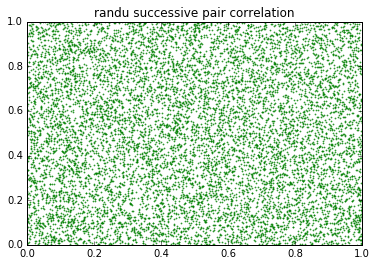

In [371]:
randu3 = randu(50,10000)
plt.plot(randu3[:-1], randu3[1:], 'g.', ms=2.5, alpha=.7)
plt.title('randu successive pair correlation');

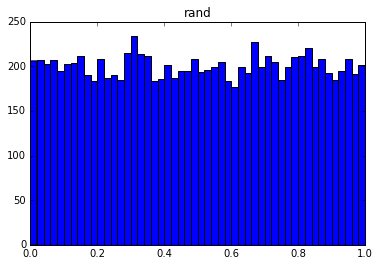

In [159]:
rnums = rand(10000)
plt.hist(rnums, bins=50)
plt.title('rand');

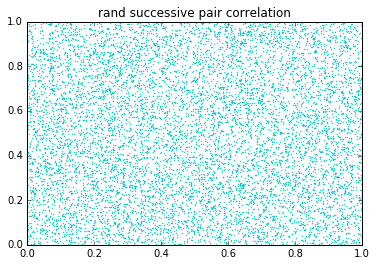

In [374]:
rnums2 = rand(10000)
plt.plot(rnums2[:-1], rnums2[1:], 'c.', ms=2, alpha=.7)
plt.title('rand successive pair correlation');


## Exercise 2. Estimate the Value of Pi
Monte Carlo integration is used in mathematics for numerical integration with the use of random numbers. Monte Carlo arbitrarially chooses points at which to evaluate an integrand. This is quite different from other algorithms that evaluate an integrand at a normal grid. The inside of the circle plotted below can be seen as domain D. The square can be seen as E. The area of the circle can be estimated by the number of points inside the circle to the total number of points in domain E. The area of the square is calculated to 4. Thus the area of the circle is that ratio multiplied by the area of the square. 

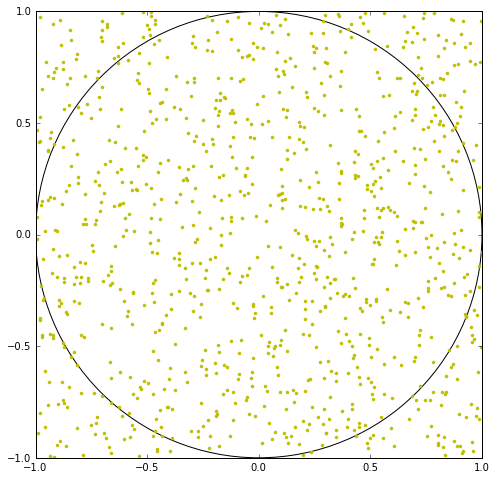

In [131]:
npts = 1000
x,y = rand(2,npts)*2 -1
radius = 1
plt.figure(figsize=(8,8))
plt.plot(x,y,'y.')
circle = plt.Circle((0,0), radius, fill=False)
plt.gca().add_artist(circle)
plt.xlim(-1,1)
plt.ylim(-1,1);

**Finding 1000 random numbers whose hypotenuse is less than or equal to the radius of the circle with center 0,0 without using hypot function**

In [354]:
npts = 1000
x2,y2 = rand(2,npts)*2 -1
radiusxy = np.zeros(1000)
for i in range(x.size):
    for j in range(y.size):
        r = mth.sqrt(x2[i]**2 + y2[j]**2)
        radiusxy[i] = r
#print(radiusxy[:100])

in_circle = []
for i in range(radiusxy.size):
    if(radiusxy[i]<=1):
        in_circle.append(radiusxy[i])
#print(in_circle[:50])
print("count of numbers that are less than or equal to the radius of the circle: {}".format(len(in_circle)))

count of numbers that are less than or equal to the radius of the circle: 999


** Finding 100 random numbers whose hypotenuse (using hypot function in python) is less than or equal to a circle of radius 1 and center 0,0 **

In [272]:
npts = 500
x3,y3 = rand(2,npts)*2 -1
x4=[]
y4=[]
inside_total = 0
total = 0
for i in range(x3.size):
    for j in range(y3.size):
        total += 1
        if hypot(x3[i],y3[j])<=1:
            x4.append(x3[i])
            y4.append(y3[j])
            inside_total += 1
# print(x2[:100],y2[:100])
print(inside_total)
print(total)

191887
250000


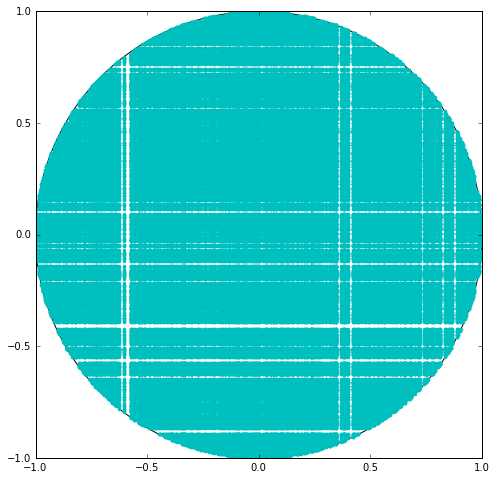

In [273]:
radius = 1
plt.figure(figsize=(8,8))
plt.plot(x4,y4,'c.')
circle = plt.Circle((0,0), radius, fill=False)
plt.gca().add_artist(circle)
plt.xlim(-1,1)
plt.ylim(-1,1);

I thought it would be interesting to plot the random numbers that fall inside the circle. For sizes of npts, there is a grid patterns in the numbers that fall inside the circle.

** Estimate of pi:**

In [271]:
pi_estimate = (inside_total/(total))*4
print(pi_estimate)


3.3169


The estimate of pi is pretty close to the actual value. It would probably be more accurate with an increase in the total number of random numbers generated and plotted in domain E and D. 

## Exercise 3. Bernoulli Random Variables
A Bernoulli random variable is a random variable that is applied to the cases of failure and success. 
<hr>
Each point is a Bernouli random variable with p = 0.6.<br>
Each game is represented by a boolean array with seven elements.<br>
The winner is the player with four or more points.<br>
<hr>
I expect Serena's probability of winning a game to be greater than 60% if the probability of her winning a point against her opponent is 60% percent. It seems intuitive that the probability will increase with each point one, making her overall probability of winning the game greater than 60%.

In [138]:
ngames = 1000

#probability of first ngames
points1 = rand(7,ngames) < 0.6
scores1 = np.sum(points1, axis=0)
wins1a = scores1 >= 4
print(np.mean(wins1a))

#probability of second ngames
points2 = rand(7,ngames) < 0.6
scores2 = np.sum(points2, axis=0)
wins2a = scores2 >= 4
print(np.mean(wins2a))

#probability of third ngames
points3 = rand(7,ngames) < 0.6
scores3 = np.sum(points3, axis=0)
wins3a = scores3 >= 4
print(np.mean(wins3a))

#probability of fourth ngames
points4 = rand(7,ngames) < 0.6
scores4 = np.sum(points4, axis=0)
wins4a = scores4 >= 4
print(np.mean(wins4a))

#probability of fifth ngames
points5 = rand(7,ngames) < 0.6
scores5 = np.sum(points5, axis=0)
wins5a = scores5 >= 4
print(np.mean(wins5a))

0.706
0.72
0.715
0.691
0.699


I was interested in knowing if there would be an apparant difference in standard deviation of game wins depending on the number of games played. I used a sample size of 5 means for ngames = 1000 and ngames = 20000. 

**Finding standard deviation of 5 mean values when ngames = 1000**

In [143]:
sd_array = [np.mean(wins1a),np.mean(wins2a),np.mean(wins3a),np.mean(wins4a), np.mean(wins5a)]
print(np.std(sd_array))

0.0104957134107


In [147]:
ngames = 20000

#probability of first ngames
points1b = rand(7,ngames) < 0.6
scores1b = np.sum(points1b, axis=0)
wins1b = scores1b >= 4
print(np.mean(wins1b))

#probability of second ngames
points2 = rand(7,ngames) < 0.6
scores2 = np.sum(points2, axis=0)
wins2b = scores2 >= 4
print(np.mean(wins2b))

#probability of third ngames
points3b = rand(7,ngames) < 0.6
scores3b = np.sum(points3b, axis=0)
wins3b = scores3b >= 4
print(np.mean(wins3b))

#probability of fourth ngames
points4b = rand(7,ngames) < 0.6
scores4b = np.sum(points4b, axis=0)
wins4b = scores4b >= 4
print(np.mean(wins4b))

#probability of fifth ngames
points5b = rand(7,ngames) < 0.6
scores5b = np.sum(points5b, axis=0)
wins5b = scores5b >= 4
print(np.mean(wins5b))

0.7076
0.7079
0.71435
0.7159
0.7119


For estimating the probability of serena winning a game, these results were expected. I expected something in the range of both result sets, with varrying ngames. I rationalized that she would have a greater than 60% chance of winning the game, because she has a 60% chance at scoring any given point. 

**Finding standard deviation of 5 mean values when ngames = 20000**

In [148]:
sd_array_b = [np.mean(wins1b),np.mean(wins2b),np.mean(wins3b),np.mean(wins4b), np.mean(wins5b)]
print(np.std(sd_array_b))

0.00334089808285


The standard deviation for mean games won greater for the smaller number of games played sample, ngames.

First one hundred scores: [6 5 3 6 4 6 3 4 3 3 6 7 3 3 4 3 5 4 4 4 4 5 4 6 4 5 4 5 5 6 5 5 6 5 4 5 3
 5 4 7 5 6 4 4 4 5 2 4 6 6 6 3 5 4 6 4 3 4 1 6 5 2 4 3 4 4 5 3 3 3 4 4 5 5
 4 5 3 3 4 3 5 3 7 4 4 3 6 4 2 2 1 4 4 5 2 2 5 5 3 3]


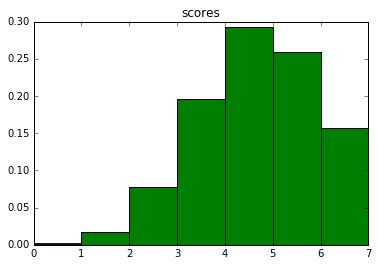

In [265]:
plt.hist(scores1b, bins=7,fc='g', normed=True);
plt.title("scores")
print("First one hundred scores: {}".format(scores1b[:100]))

The distribution of the histogram above is expected. I expected the histogram to be skewed towards the greater numbers, given serena's expected game win probability.

## Exercise 4. Sums of Random Variables
**Goal:** We want to find f(M) such that $$\lim_{M\to\infty} \frac{sum(m tuples)}{f(M)}$$

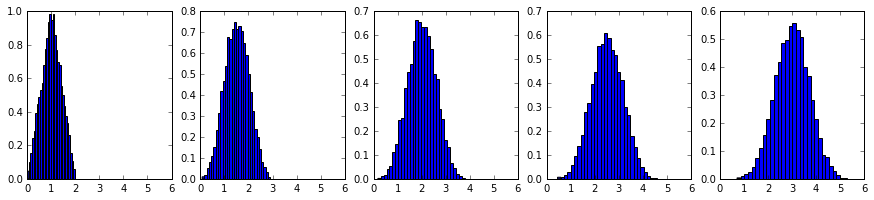

In [324]:
plt.figure(figsize=(15,3))
npts=10000
for M in range(2,7):
    sums = np.sum(rand(M, npts), axis=0)
    plt.subplot(1, 5, M-1)
    plt.hist(sums, bins=30, normed=True)
    plt.xlim(0,6)

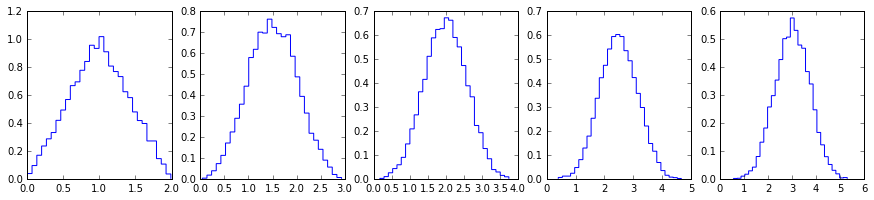

In [325]:
plt.figure(figsize=(15,3))
npts=10000
for M in range(2,7):
    sums = np.sum(rand(M, npts), axis=0)
    plt.subplot(1, 5, M-1)
    plt.hist(sums, bins=30, normed=True,  histtype='step')
    plt.xlim(0,M)

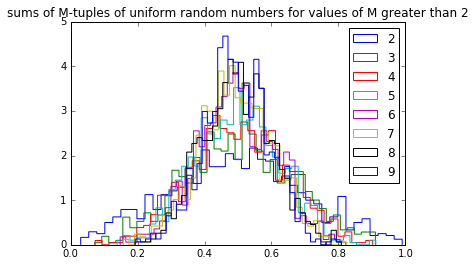

In [384]:
for M in range(2,10):
    sums = np.sum(rand(M,npts), axis=0)
    plt.hist((sums)/M, bins=40, histtype='step', normed=True, label=str(M))
plt.title('sums of M-tuples of uniform random numbers for values of M greater than 2')
plt.legend()


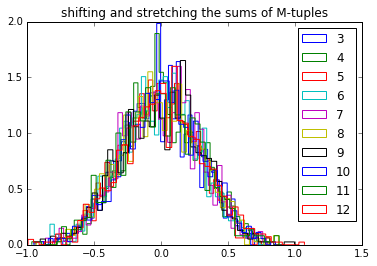

In [385]:
for M in range(3,13):
    sums = np.sum(rand(M,npts), axis=0)
    plt.hist((sums-M/2.)/log(M*2), bins=50,normed=True, histtype='step', label=str(M)) 
plt.title('shifting and stretching the sums of M-tuples')
plt.legend();

## Exercise 5: The Exponential Distribution

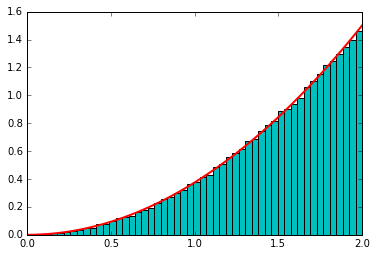

In [210]:
u = rand(100000)
v = 2*u**(1/3)
plt.hist(v, normed=True, bins=50, fc='c')
x = np.linspace(0, 2)
y = 0.375*x**2
plt.plot(x, y, 'r', lw=2);

** The exponential distribution for Carbon-14  →→  Nitrogen-14 decay **

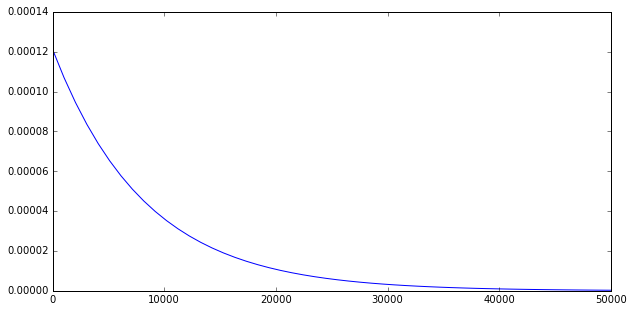

In [363]:
plt.figure(figsize=(10,5))
lam = 1/8267
tmax = 50000
t = np.linspace(0, tmax)
p = lam*np.exp(-lam*t) #pdf
plt.plot(t, p)
plt.xlim(0, tmax);

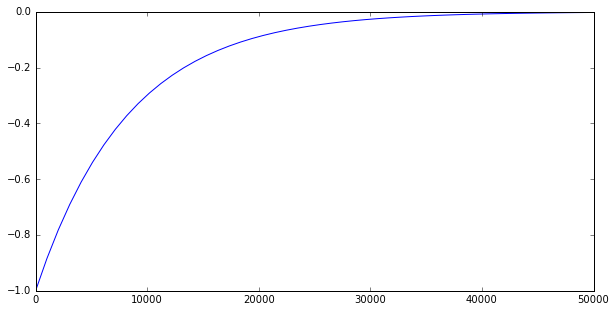

In [365]:
plt.figure(figsize=(10,5))
lam = 1/8267
tmax = 50000
t2 = np.linspace(0, tmax)
p2_integrated = (-1)*(np.exp(-lam*t2))
plt.plot(t2, p2_integrated);

[ 0.63147368  0.74326863  0.58272388 ...,  0.38975974  0.8555015
  0.03891334]


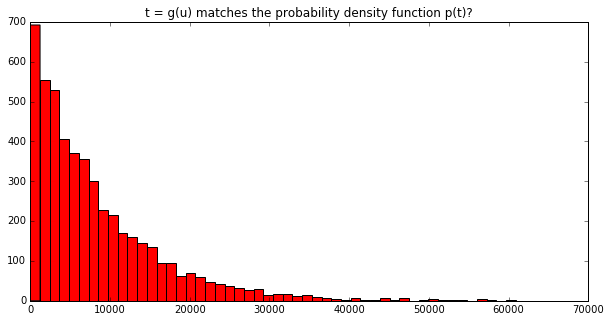

In [375]:
plt.figure(figsize=(10,5))
lam = 1/8267
tmax = 50000
tresults = []
rand_nums = rand(5000)
print(rand_nums)

for i in rand_nums:
    tnum = mth.log(i)/(-lam) #this should match the pdf.. tnum is t solved for in p_integrated
    tresults.append(tnum)
plt.hist(tresults, bins=50, fc='r')
plt.title('t = g(u) matches the probability density function p(t)?');

## Exercise 6. To Switch or Not to Switch

**Question:** You choose a box. The instructor then opens one other box, and shows you that it’s empty. You are then offered a choice. You can stick with the box you initially chose, or you can switch to the remaining other box. What should you do? <br>
**Answer:** I would switch the box I had chosen to increase the probability that I choose the winning box. Rather than still having that 1/3 chance it is the the correct box, I have a 50% chance it is the correct box. My odds increase by switching boxes.

In [274]:
ngames = 1000
winning = randint(1, 4, size=ngames)
print(winning[-50:]) 

[1 2 3 1 2 3 2 3 3 2 2 1 2 2 2 1 2 2 3 2 3 2 3 3 3 3 3 3 3 3 2 1 1 3 2 3 2
 3 2 2 3 1 3 2 3 3 1 3 1 3]


In [275]:
chosen = np.ones(ngames, dtype=int)
print(chosen[-50:] == winning[-50:])
print(np.mean(chosen == winning))

[ True False False  True False False False False False False False  True
 False False False  True False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False  True False False False False  True False
  True False]
0.314


In [276]:
switched = np.where(winning==chosen, randint(2,4, size=ngames), winning)
print(np.mean(switched == winning))

0.686


I chose ngames equals 1000 to try and get more accurate data with a larger sample for the mean. There is a much greater chance of choosing the correct box when switching the chosen box. From the values returned, there is about a 30% greater chance of choosing the correct box when switching.

## Exercise 7. Stock Market Model

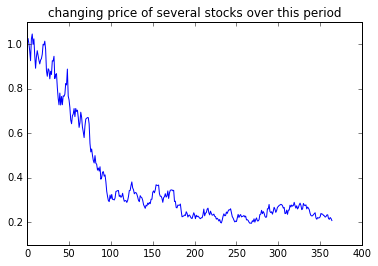

In [355]:
mu = 0.0
sigma = 0.05
tmax = 365
s = 1
prices = np.empty(tmax)
prices[0] = s
for t in range(1, tmax):
    s *= 1 + mu + sigma*randn()
    prices[t] = s
plt.plot(prices)
plt.title("changing price of several stocks over this period");


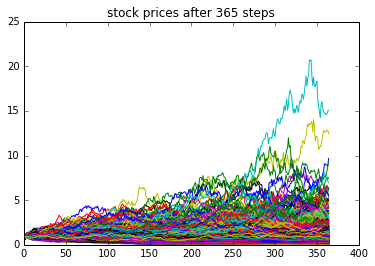

In [356]:
mu = 0.0
sigma = 0.05
tmax = 365
s = 1
prices = np.empty([tmax, 1000])
for t in range(1, tmax):
    s *= 1 + mu + sigma*randn(1000)
    prices[t] = s
plt.plot(prices)
plt.title("stock prices after 365 steps");

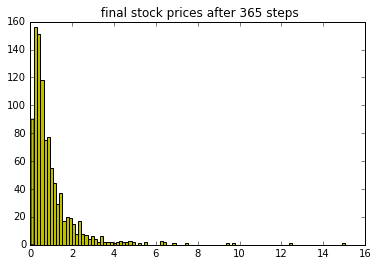

In [357]:
plt.hist(prices[-1],bins=100, fc='y')
plt.title(" final stock prices after 365 steps");

In [369]:
expected_value = np.mean(prices)
print("Expected value of the investment after 1 year: {}".format(expected_value))

Expected value of the investment after 1 year: 0.9932392234111257


In [376]:
money_lost = prices[-1]<1
total_money = np.sum(money_lost)
total_percent = (total_money/prices.shape[1])*100
#print(money_lost)
print("The likelihood of losing money: {}".format(total_percent))

The likelihood of losing money: 56.699999999999996


In [360]:
likely_value = np.mean(prices[-1])
print("The most likely value of the investment after 1 year is {}".format(likely_value))

The most likely value of the investment after 1 year is 0.9880257234910016


** More modest value of sigma, $\sigma = 0.01$ **

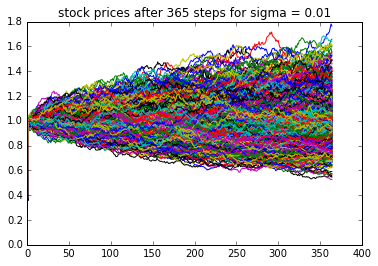

In [361]:
mu = 0.0
sigma = 0.01 #sigma is changed to smaller value
tmax = 365
s = 1
prices = np.empty([tmax, 1000])
for t in range(1, tmax):
    s *= 1 + mu + sigma*randn(1000)
    prices[t] = s
plt.plot(prices)
plt.title("stock prices after 365 steps for sigma = {}".format(sigma));

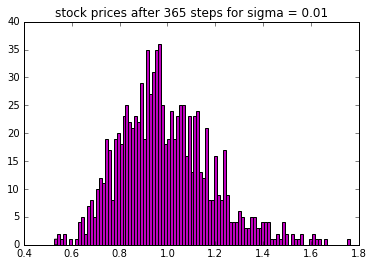

In [362]:
plt.hist(prices[-1],bins=100, fc='m')
plt.title("stock prices after 365 steps for sigma = {}".format(sigma));